Description
Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

S.No.: Serial number, 
Name: Name of the car which includes brand name and model name, 
Location: Location in which the car is being sold or is available for purchase (cities),
Year: Manufacturing year of the car, 
Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km,
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG),
Transmission: The type of transmission used by the car (Automatic/Manual),
Owner: Type of ownership,
Mileage: The standard mileage offered by the car company in kmpl or km/kg,
Engine: The displacement volume of the engine in CC,
Power: The maximum power of the engine in bhp,
Seats: The number of seats in the car,
New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR),
Price: The price of the used car in INR Lakhs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression

# Introduction

As the demand for second hand cars is increasing due to chip shortage (which is causing massive delays in the import of newer models), the data sciene team at Cars4U has been asked to build a linear regression model by studying the provided data, doing Exploratory data analysis, data preprocessing, and then doing linear regression on the clean data. This is done to predict the price of second hand cars, apart from providing recommendations to the company to boost the sale of second hand cars and earn more profit.

# 1. Loading and exploring the data

In [2]:
df = pd.read_csv("used_cars_data.csv", index_col='S.No.')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00000,9.47000,6.00000
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00000,5.44000,4.11000
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00000,35.29000,6.00000
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00000,86.97000,35.28000
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00000,8.23000,6.34000
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.00000,28.05000,24.82000
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00000,86.97000,32.00000
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00000,67.10000,20.77000
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00000,10.25000,2.50000


### Checking columns to identify which columns can be used as categorical columns

In [3]:
#1. First let's check Fuel_Type
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [4]:
#Fuel_Type can be used as categorial column

#Now let's check transmission column
df['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [5]:
#Transmission can be used as categorial column

#Now let's check owner type column
df['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [6]:
#Owner_Type can be used as categorial column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.3+ KB


### Observations
1. From the 12 columns, 2 columns are string types (name, location), 3 are categorical (owner_type, transmission and fuel_type), kilometers driver and year are integers and remaining are either already floating type (price, new_price, seats) or need to be converted to float type (mileage, engine, power).
2. Not all columns have values
3. The data occupies 793.3 KB of memory space.

Convert 3 columns into categorical columns

In [8]:
#convert owner_type into categorical data type
df.Owner_Type = df.Owner_Type.astype('category')

#convert marital status into categorical data type
df.Transmission = df.Transmission.astype('category')

#convert marital status into categorical data type
df.Fuel_Type = df.Fuel_Type.astype('category')

In [9]:
#now to confirm the change in data types of the columns of the input data set.
df.dtypes

Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                 float64
New_Price             float64
Price                 float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7078 non-null   object  
 10  Seats              7200 non-null   float64 
 11  New_Price          7253 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(3), int64(2), object(5)
memory usage: 645.1+ KB


Observation: Upon converting the 3 columns into categorical variables, our memory usage has reduced from 793.3 KB to 645.1 KB

### 4. Describing the floating variables

In [11]:
df.describe()

,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.00000,7253.00000,7200.00000,7253.00000,6019.00000
mean,2013.36537,58699.06315,5.27972,21.30732,9.47947
std,3.25442,84427.72058,0.81166,24.25631,11.18792
min,1996.00000,171.00000,0.00000,3.91000,0.44000
25%,2011.00000,34000.00000,5.00000,7.88000,3.50000
50%,2014.00000,53416.00000,5.00000,11.30000,5.64000
75%,2016.00000,73000.00000,5.00000,21.69000,9.95000
max,2019.00000,6500000.00000,10.00000,375.00000,160.00000


Observations:
1. 50% of the cars are 2014 model or older. 75% of the cars are 2016 model or older. The latest second hand model is of 2019.
2. The average kilometers a second hand car has been driven is 58699.06 kilometers and the maximum kilometers a second hand car has been driven is 6500000 kilometers.
3. The average second hand car is a 5-seater car, while the maximum number of seats in a car is 10.
4. The average price of a second hand car is Rs. 9.47 lac while the maximum price is Rs. 1.6 crore.

# 2. Data Preprocessing Steps

## 2.0 Feature Engineering

We will first handle the Mileage, Engine and Power columns since they have units and we can get rid of those units and convert them into floating values.


### 2.1 Handling the Mileage Column

Based on the given information in the initial information, there are 2 possible units for any value and there is a space between the value and the unit. So we can split each cell of the column on the space and then just keep the first value in the newly created list.

In [12]:
#We first split the values in this column into an list called new, and then use the first element of the list as the value of the column
new = df["Mileage"].str.split(" ", n = 1, expand = True)
df["Mileage"]= new[0]
df["Mileage"] = df["Mileage"].astype("float", copy = False)


### 2.2 Handling the Engine Column

Based on the given information in the initial information, there only possible unit for any value and there is a space between the value and the unit. So we can split each cell of the column on the space and then just keep the first value in the newly created list.

In [13]:
#We first split the values in this column into an list called new, and then use the first element of the list as the value of the column
new = df["Engine"].str.split(" ", n = 1, expand = True)
df["Engine"]= new[0]
df["Engine"] = df["Engine"].astype("float",copy = False)


### 2.3 Handling the Power Column

Based on the given information in the initial information, there only possible unit for any value and there is a space between the value and the unit. So we can split each cell of the column on the space and then just keep the first value in the newly created list.

In [14]:
#We first split the values in this column into an list called new, and then use the first element of the list as the value of the column
new = df["Power"].str.split(" ", n = 1, expand = True)
df["Power"]= new[0]
df["Power"] = df["Power"].astype("float", copy = False)


### Now we can print the new data frame and check the data types of each column

In [15]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,5.51000,1.75000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,16.06000,12.50000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61000,4.50000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,11.27000,6.00000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,53.14000,17.74000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54000,1598.00000,103.60000,5.00000,13.23000,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21000,1197.00000,103.60000,5.00000,10.15000,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08000,1461.00000,63.10000,5.00000,9.47000,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          7253 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 645.1+ KB


Observation
1. From the 12 columns, 2 columns are string types (name, location), 3 are categorical (owner_type, transmission and fuel_type), kilometers driver and year are integers and remaining are now floating type (price, new_price, seats, mileage, engine, power).
2. Not all columns have values
3. The data occupies 645.1 KB of memory space.


### 2.4 Now we check for missing values

In [17]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

Observations
1. Our dependent variable Price has the maximum missing values.
2. Power has the second highest missing values, followed by seats, engine and mileage. No other column has missing values.

In [18]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1).value_counts()
num_missing

0    5872
1    1308
3      36
2      27
4      10
dtype: int64

Observations
1. There are 5872 out of 7253 rows that have 0 missing values. Rest of the rows have 1 or more missing values.
2. The maximum missing values in a row are 4.

2.4.1 Let's check the power column to see if it is skewed or not

<AxesSubplot:xlabel='Power', ylabel='Count'>

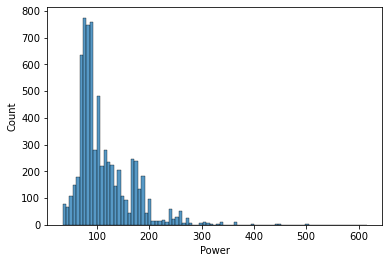

In [19]:
sns.histplot(df.Power)

Observation : The graph is right skewed so we can fill the missing values with the median value of the column (Impute).

In [20]:
m1 = df["Power"].median()
m1

94.0

In [21]:
df["Power"].fillna(df["Power"].median(), inplace=True)

2.4.2 Let's check the Seats column to see if it is skewed or not

<AxesSubplot:xlabel='Seats', ylabel='Count'>

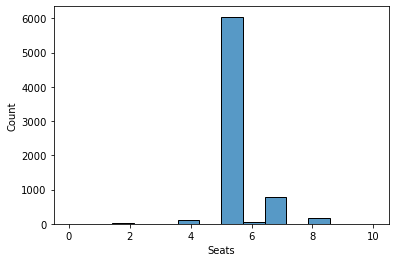

In [22]:
sns.histplot(df.Seats)

Observation : The graph is not skewed so we can fill the missing values with the mean value of the column (Impute).

In [23]:
# fill missing values with median column values
df["Seats"].fillna(df["Seats"].mean(), inplace=True)

2.4.3 Let's check the Engine column to see if it is skewed or not

<AxesSubplot:xlabel='Engine', ylabel='Count'>

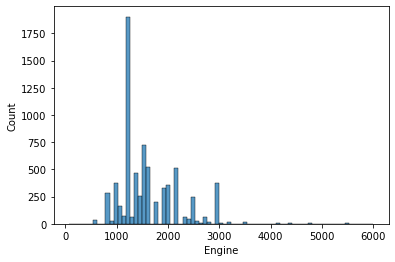

In [24]:
sns.histplot(df.Engine)

Observation : The graph is right skewed so we can fill the missing values with the median value of the column (Impute).

In [25]:
# fill missing values with median column values
df["Engine"].fillna(df["Engine"].median(), inplace=True)

<AxesSubplot:>

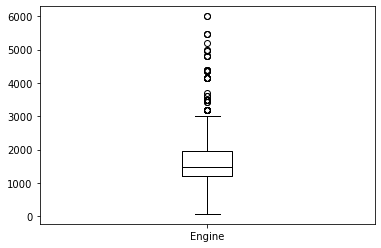

In [26]:
#Boxplot of the engine of our vehicles.
df.boxplot(column=['Engine'], grid=False, color='black')

This is a clear case of outliers being present, so we can try to handle the outliers.

In [27]:
quartiles = np.quantile(df['Engine'][df['Engine'].notnull()], [.25, .75])
engine_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {engine_4iqr}')
outlier_powers = df.loc[np.abs(df['Engine'] - df['Engine'].median()) > engine_4iqr, 'Power']
outlier_powers

Q1 = 1198.0, Q3 = 1968.0, 4*IQR = 3080.0


S.No.
70     500.00000
152    362.90000
2100   550.00000
2978   394.30000
4451   395.00000
4691   421.00000
4722   387.30000
5088   503.00000
5521   552.00000
5603   394.30000
5781   560.00000
5919   488.10000
6354   616.00000
Name: Power, dtype: float64

Now the 4*IQR value is 3080 and 75% of the values are less than or equal to 1968. So the ones greater than 1968 can be removed.

In [28]:
# if we wanted to make these NA we could just do this
# [not run]
df.loc[np.abs(df['Engine'] - df['Engine'].median()) > engine_4iqr, 'Engine'] = np.nan

In [29]:
# dropping these rows
# [not run]
df.drop(outlier_powers.index, axis=0, inplace=True)

In [30]:
engine = df['Power'][df['Power'].notnull()]

print(engine.mean())  # the mean is being pulled
print(engine.median())

111.66827140883886
94.0


2.4.4 Let's check the Mileage column to see if it is skewed or not

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

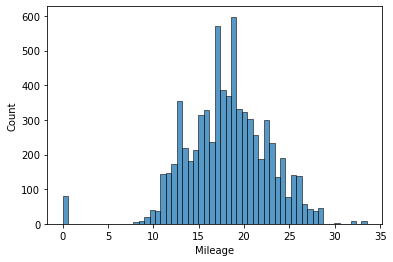

In [31]:
sns.histplot(df.Mileage)

Observation : The graph is not skewed so we can fill the missing values with the mean value of the column (Impute).

In [32]:
# fill missing values with median column values
df["Mileage"].fillna(df["Mileage"].mean(), inplace=True)

<AxesSubplot:>

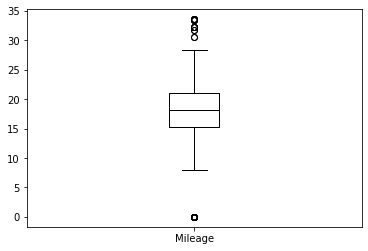

In [33]:
#Boxplot of the Mileage of our vehicles.
df.boxplot(column=['Mileage'], grid=False, color='black')

This is a clear case of outliers being present, so we can try to handle the outliers.

In [34]:
quartiles = np.quantile(df['Mileage'][df['Mileage'].notnull()], [.25, .75])
mileage_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {mileage_4iqr}')
outlier_powers = df.loc[np.abs(df['Mileage'] - df['Mileage'].median()) > mileage_4iqr, 'Mileage']
outlier_powers

Q1 = 15.26, Q3 = 21.1, 4*IQR = 23.360000000000007


Series([], Name: Mileage, dtype: float64)

Now the 4*IQR value is 23.3 and 75% of the values are less than or equal to 21. So the ones greater than 21 can be removed.

In [35]:
# if we wanted to make these NA we could just do this
# [not run]
df.loc[np.abs(df['Mileage'] - df['Mileage'].median()) > mileage_4iqr, 'Mileage'] = np.nan

In [36]:
# dropping these rows
# [not run]
df.drop(outlier_powers.index, axis=0, inplace=True)

In [37]:
mileage = df['Power'][df['Power'].notnull()]

print(mileage.mean())  # the mean is being pulled
print(mileage.median())

111.66827140883886
94.0


Since Price is our dependent variable, hence all missing values will have to be dropped

In [38]:
#df["Price"].dropna(axis = 0, inplace = True)
df.dropna(subset = ["Price"], inplace=True)

Now all are missing values have been handled, so let's just confirm this one more time

In [39]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6007 non-null   object  
 1   Location           6007 non-null   object  
 2   Year               6007 non-null   int64   
 3   Kilometers_Driven  6007 non-null   int64   
 4   Fuel_Type          6007 non-null   category
 5   Transmission       6007 non-null   category
 6   Owner_Type         6007 non-null   category
 7   Mileage            6007 non-null   float64 
 8   Engine             6007 non-null   float64 
 9   Power              6007 non-null   float64 
 10  Seats              6007 non-null   float64 
 11  New_Price          6007 non-null   float64 
 12  Price              6007 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 534.4+ KB


In [41]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,6007.00000,6007.00000,6007.00000,6007.00000,6007.00000,6007.00000,6007.00000,6007.00000
mean,2013.36224,58791.20326,18.15208,1613.46512,112.10405,5.28213,21.32605,9.38231
std,3.26883,91348.29462,4.56902,578.90183,50.96966,0.80149,23.70392,10.89985
min,1998.00000,171.00000,0.00000,72.00000,34.20000,0.00000,3.91000,0.44000
25%,2011.00000,34000.00000,15.26000,1198.00000,78.00000,5.00000,7.88000,3.50000
50%,2014.00000,53073.00000,18.16000,1493.00000,94.00000,5.00000,11.30000,5.60000
75%,2016.00000,73000.00000,21.10000,1968.00000,138.03000,5.00000,21.77000,9.90000
max,2019.00000,6500000.00000,33.54000,4395.00000,450.00000,10.00000,230.00000,160.00000


### 2.5 Outlier detection and handling

Based on the processed data, it is evident that in the kilometers_driven column, the mean is 58,738.38 kms, while the maximum is 6500000 kms. This means that there is an outlier value in this column. Similarly we can check the engine and power column as well for outliers.




<AxesSubplot:>

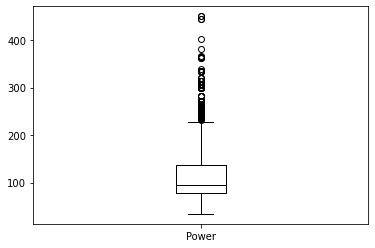

In [42]:
#Boxplot of the power of our vehicles.
df.boxplot(column=['Power'], grid=False, color='black')

This is a clear case of outliers being present, so we can try to handle the outliers.

In [43]:
quartiles = np.quantile(df['Power'][df['Power'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['Power'] - df['Power'].median()) > power_4iqr, 'Power']
outlier_powers

Q1 = 78.0, Q3 = 138.03, 4*IQR = 240.12


S.No.
134    362.07000
148    444.00000
418    367.00000
459    335.20000
586    335.20000
589    364.90000
1093   335.20000
1930   364.90000
2095   362.07000
3132   340.00000
3242   335.30000
3341   402.00000
4061   444.00000
4342   364.90000
4388   335.20000
4559   335.20000
4627   450.00000
4821   450.00000
4938   335.20000
5341   382.00000
5416   335.30000
Name: Power, dtype: float64

Now the 4*IQR value is 240 and 75% of the values are less than or equal to 138. So the ones greater than 138 can be removed.

In [44]:
# if we wanted to make these NA we could just do this
# [not run]
df.loc[np.abs(df['Power'] - df['Power'].median()) > power_4iqr, 'Power'] = np.nan

In [45]:
# dropping these rows
# [not run]
df.drop(outlier_powers.index, axis=0, inplace=True)

In [46]:
power = df['Power'][df['Power'].notnull()]

print(power.mean())  # the mean is being pulled
print(power.median())

111.19769127965166
94.0


# 3. Exploratory Data Analysis

Now we have done our data pre-processing and it is time to analyse our input data before we do linear regression on the data set. 

In [47]:
#Checking data types of our input data.
df.dtypes

Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
dtype: object

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5986.00000,2013.36335,3.26667,1998.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,5986.00000,58832.14350,91492.59563,171.00000,34000.00000,53092.50000,73000.00000,6500000.00000
Mileage,5986.00000,18.17491,4.55780,0.00000,15.26000,18.16000,21.10000,33.54000
Engine,5986.00000,1605.90762,564.62253,72.00000,1198.00000,1493.00000,1968.00000,4367.00000
Power,5986.00000,111.19769,48.64189,34.20000,77.00000,94.00000,138.03000,333.00000
Seats,5986.00000,5.28278,0.79803,0.00000,5.00000,5.00000,5.00000,10.00000
New_Price,5986.00000,21.05125,23.21383,3.91000,7.88000,11.30000,21.08500,230.00000
Price,5986.00000,9.27056,10.67203,0.44000,3.50000,5.60000,9.75000,160.00000


### 3.1 Univariate analysis

3.1.1 Study of the year of our second hand vehicles

<AxesSubplot:xlabel='Year', ylabel='Count'>

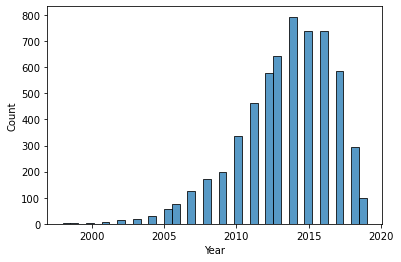

In [49]:
#Histogram of the year of the second hand vehicles.
sns.histplot(df.Year)

Observations
1. The mean year from the above statistics is 2013. 
2. The graph shows that most of our second hand cars in in years between 2011 and 2019. 
3. There is a left skew in our graph.

<AxesSubplot:>

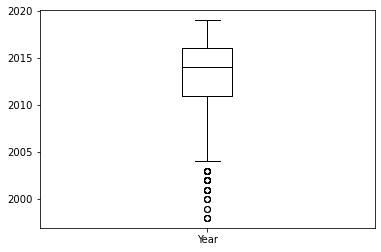

In [50]:
#Boxplot of the year of our vehicles.
df.boxplot(column=['Year'], grid=False, color='black')

Observations
1. The mean year from the above statistics is 2013. 
2. There are only a few outliers in our boxplot.

3.1.2 Study of the kilometers driven by our second hand vehicles

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

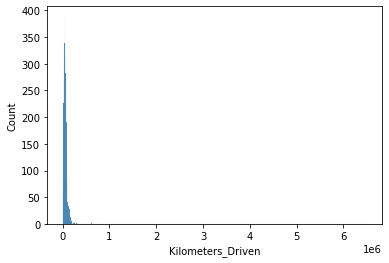

In [51]:
#Histogram of the kilometers driven of our second hand vehicles.
sns.histplot(df.Kilometers_Driven)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  13.,   3.,   2.,
         11.,   5.,  11.,  12.,  18.,  20.,  26.,  47.,  63., 120., 140.,
        219., 327., 430., 585., 727., 987., 954., 648., 285., 192.,  90.,
         25.,  14.,   3.,   0.,   3.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 5.14749448,  5.35829085,  5.56908721,  5.77988358,  5.99067995,
         6.20147632,  6.41227269,  6.62306905,  6.83386542,  7.04466179,
         7.25545816,  7.46625453,  7.6770509 ,  7.88784726,  8.09864363,
         8.30944   ,  8.52023637,  8.73103274,  8.94182911,  9.15262547,
         9.36342184,  9.57421821,  9.78501458,  9.99581095, 10.20660731,
        10.41740368, 10.62820005, 10.83899642, 11.04979279, 11.26058916,
        11.47138552, 11.68218189, 11.89297826, 12.10377463, 12.314571  ,
        12.52536737, 12.73616373, 12.9469601 , 13.15775647, 13.36855284,
        13.57934921, 13.79014557, 14.00094194, 14.21173831, 14.42253468,
 

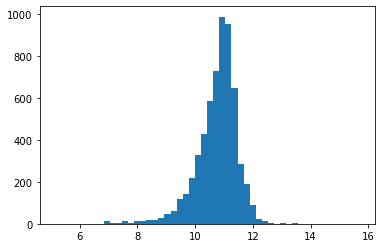

In [52]:
#since the graph is not clear on the regular scale, we can do log transformation and see the graph of that.
#Also, since distance can be 0, we need to add one to our result.
plt.hist(np.log(df['Kilometers_Driven']+1), 50)

<AxesSubplot:>

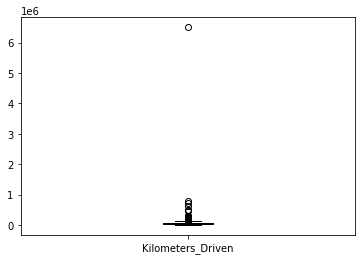

In [53]:
#Boxplot of the kilometers driven of our vehicles.
df.boxplot(column=['Kilometers_Driven'], grid=False, color='black')

Observations
1. The mean kilometers driven from the above statistics is close to 58,700 kms.  
2. There is no skewness in our graph.

3.1.3 Study of the mileage of our second hand vehicles

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

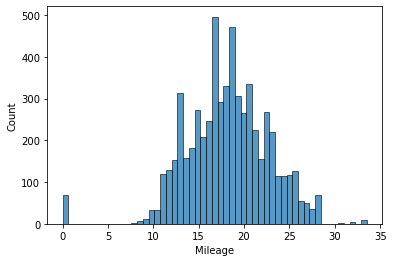

In [54]:
#Histogram of the mileage of our second hand vehicles.
sns.histplot(df.Mileage)

Observations
1. The mean year from the above statistics is 18.14. 
2. The graph shows that most of our second hand cars have mileage less than or equal to 21. 
3. There is no skewness in our graph.

<AxesSubplot:>

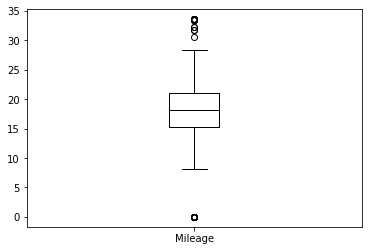

In [55]:
#Boxplot of the mileage of our vehicles.
df.boxplot(column=['Mileage'], grid=False, color='black')

Observations
1. The mean mileage from the above statistics is close to 18. 
2. There are only a few outliers in our boxplot.

3.1.4 Study of the engine of our second hand vehicles

<AxesSubplot:xlabel='Engine', ylabel='Count'>

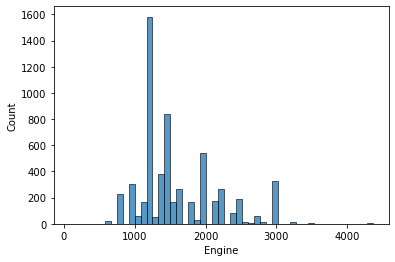

In [56]:
#Histogram of the engine of our second hand vehicles.
sns.histplot(df.Engine)

Observations
1. The mean CC from the above statistics is 1615. 
3. There is right skewness in our graph.

<AxesSubplot:>

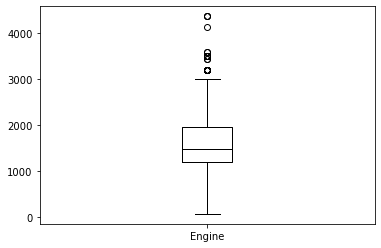

In [57]:
#Boxplot of the engine of our vehicles.
df.boxplot(column=['Engine'], grid=False, color='black')

Observations
1. The mean CC from the above statistics is 1615. 
2. There are quite a few outliers in our boxplot.

3.1.5 Study of the engine of our second hand vehicles

<AxesSubplot:xlabel='Power', ylabel='Count'>

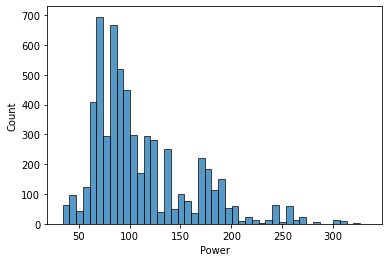

In [58]:
#Histogram of the power of our second hand vehicles.
sns.histplot(df.Power)

Observations
1. The mean year from the above statistics is 112 Bhp. 
2. The graph shows that most of our second hand cars have mileage less than or equal to 138. 
3. There is right skewness in our graph.

<AxesSubplot:>

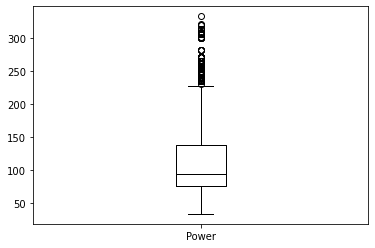

In [59]:
#Boxplot of the power of our vehicles.
df.boxplot(column=['Power'], grid=False, color='black')

Observations

1. The mean power from the above statistics is 112.
2. There are a lot of outliers in our boxplot.

3.1.6 Study of the seats of our second hand vehicles

<AxesSubplot:xlabel='Seats', ylabel='Count'>

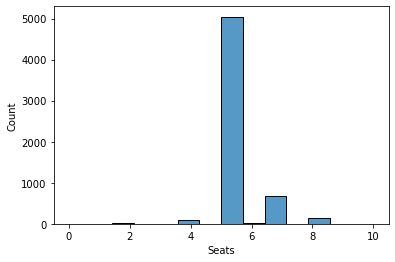

In [60]:
#Histogram of the seats of our second hand vehicles.
sns.histplot(df.Seats)

Observations

1. The mean number of seats in a second hand car from the above statistics is 5.
2. There is left skewness in the graph.

<AxesSubplot:>

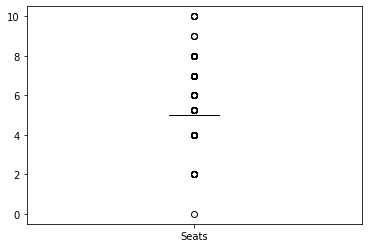

In [61]:
#Boxplot of the power of our vehicles.
df.boxplot(column=['Seats'], grid=False, color='black')

3.1.7 Checking count of manual versus automatic vehicles

<AxesSubplot:xlabel='Transmission', ylabel='Count'>

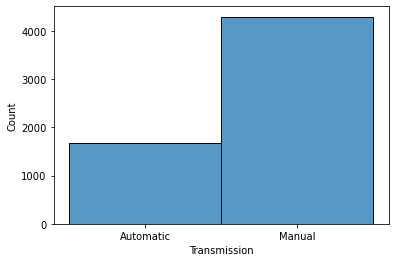

In [62]:
sns.histplot(df.Transmission)

Observations: There are many more manual cars that automatic cars

3.1.8 Checking count of vehicles grouped by their fuel type

<AxesSubplot:xlabel='Fuel_Type', ylabel='Count'>

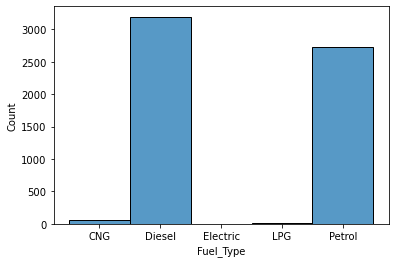

In [63]:
sns.histplot(df.Fuel_Type)

Observations: 
1. There are many more diesel and petrol cars than LPG and CNG.
2. Diesel is the most preferred mode of fuel, followed by petrol.

### 3.2 Bivariate analysis

#### 3.2.1. Use Pairplot to show relationship of each numerical column with other column when compared with respect to price.

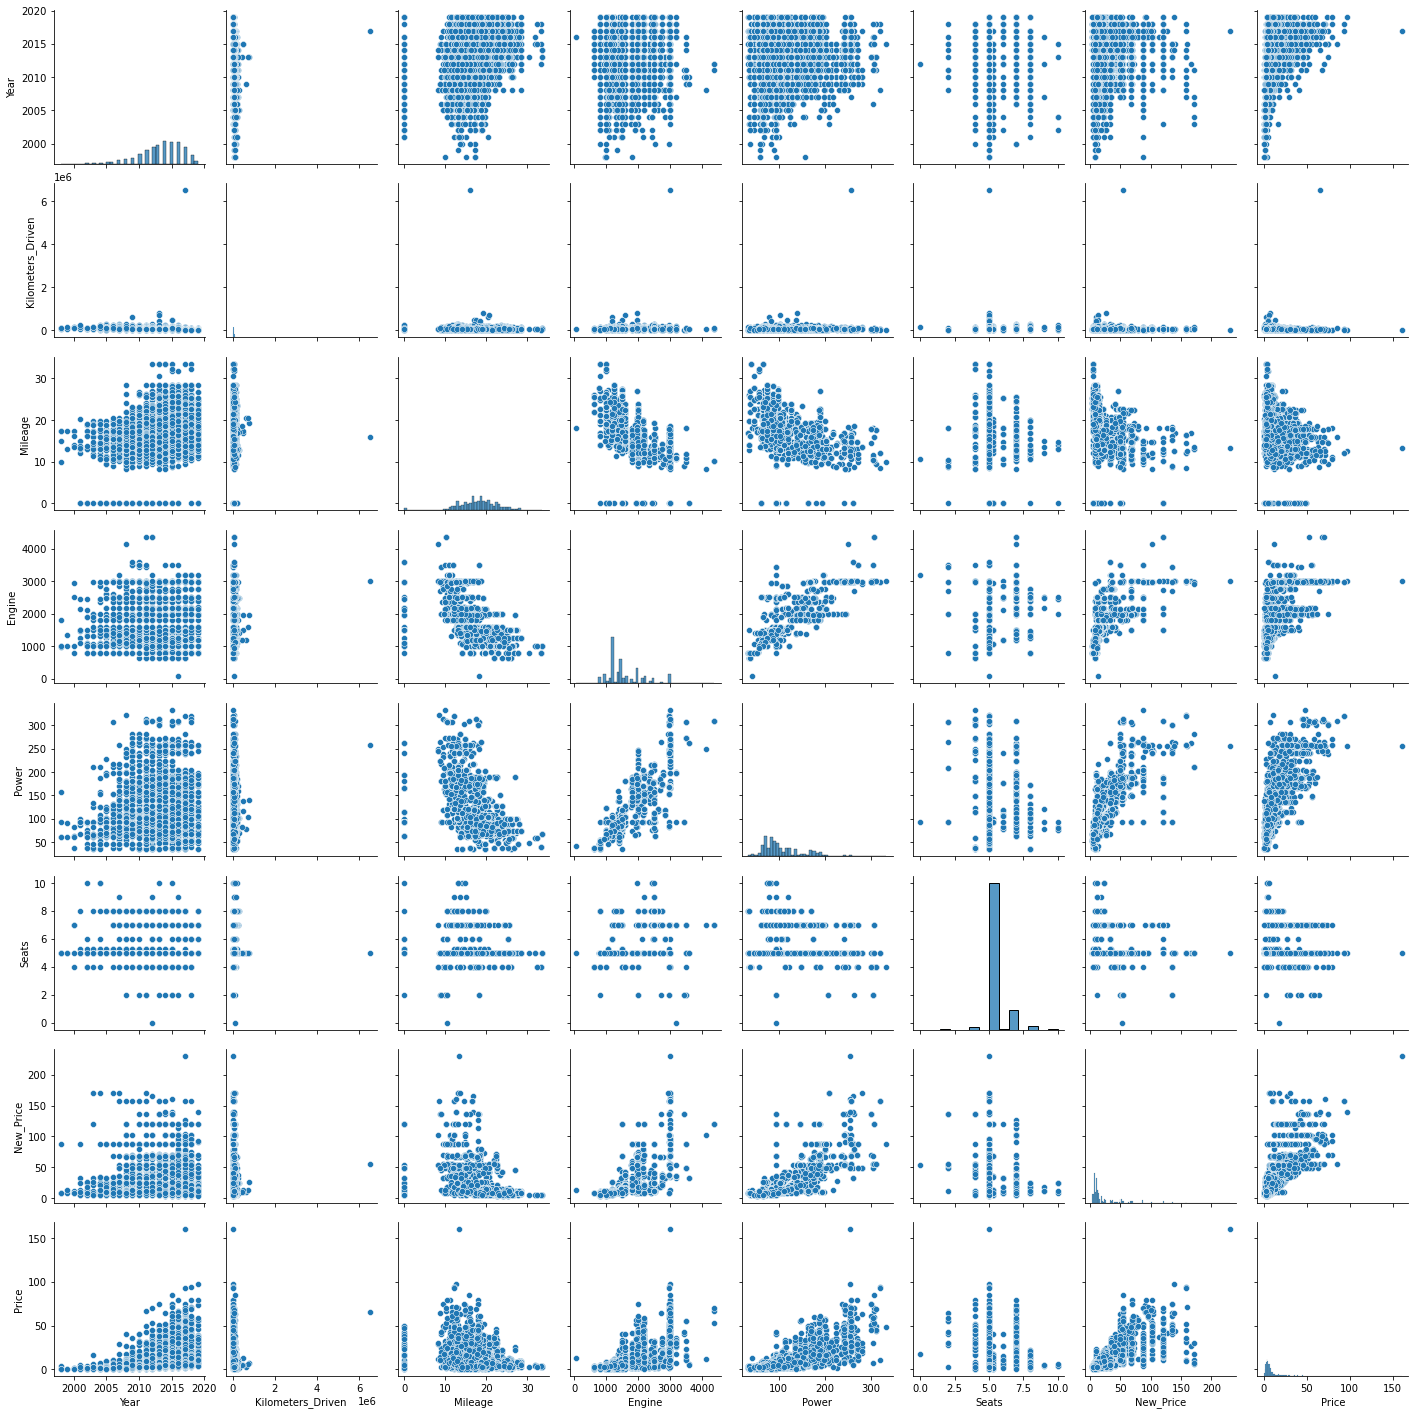

In [64]:
#Create a pairplot on the cardio data frame and display the output.
sns.pairplot(df)
plt.show()

Observations:
1. When price is compared to year, as year becomes closer to present day, the price generally increases.
2. As the power of the vehicle increases, so does its price.
3. A higher powered vehicle has a higher engine performance.
4. As the engine performance increases, the price increases.

#### 3.2.2. Find correlation among columns to justify above observations

In [65]:
#find correlation among columns
correlation = df.corr()
correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.00000,-0.17326,0.32029,-0.04283,0.04197,0.01149,-0.00108,0.32129
Kilometers_Driven,-0.17326,1.00000,-0.06721,0.10162,0.04169,0.08131,0.02067,-0.00650
Mileage,0.32029,-0.06721,1.00000,-0.58549,-0.49461,-0.31672,-0.40903,-0.29497
Engine,-0.04283,0.10162,-0.58549,1.00000,0.84685,0.45071,0.68672,0.63784
Power,0.04197,0.04169,-0.49461,0.84685,1.00000,0.15144,0.79463,0.76722
Seats,0.01149,0.08131,-0.31672,0.45071,0.15144,1.00000,0.05504,0.08643
New_Price,-0.00108,0.02067,-0.40903,0.68672,0.79463,0.05504,1.00000,0.77575
Price,0.32129,-0.00650,-0.29497,0.63784,0.76722,0.08643,0.77575,1.00000


Observations
1. Older the car, more the chances that it has more kilometers on its odometer.
2. Higher the mileage, less powerful is the engine and its power.
3. Engine and power are very strongly correlated. Higher performance engines are more powerful.
4. Price and Power are also strongly correlated. A more powerful vehicle is more expensive.
5. A more powerful engine is more costly, but are less correlated to each other than power and price.

#### 3.2.3. Heatmap of the correlation among columns

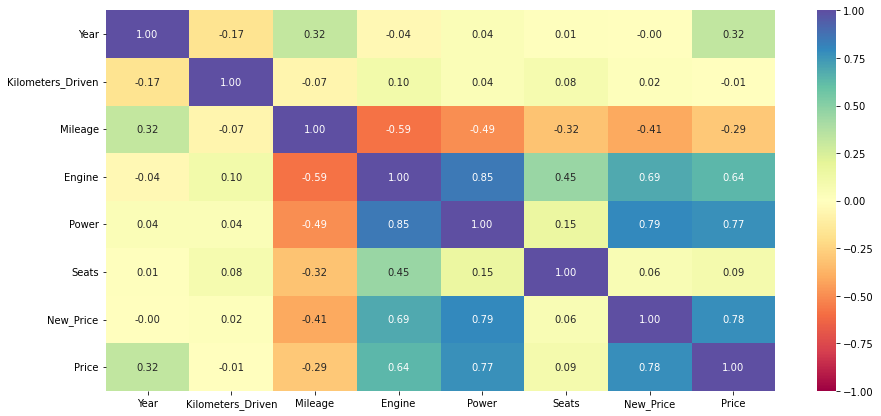

In [66]:
#Here we are drawing a heatmap of the correlation matrix in the previous step and each variable's correlation is shown with corresponding columns
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, 
            fmt=".2f", cmap="Spectral")
plt.show()

3.2.4 Drilling down on number of second hand cars based on transmission and Fuel_Type

In [67]:
#Using GroupBy query on Transmission and Fuel Type and aggregating on the count of number of second hand cars.
df_groupanalysis = df.groupby(['Transmission','Fuel_Type']).agg('count')
df_groupanalysis

Name  Location  Year  Kilometers_Driven  Owner_Type  \
Transmission Fuel_Type                                                        
Automatic    CNG           0         0     0                  0           0   
             Diesel     1098      1098  1098               1098        1098   
             Electric      2         2     2                  2           2   
             LPG           0         0     0                  0           0   
             Petrol      587       587   587                587         587   
Manual       CNG          56        56    56                 56          56   
             Diesel     2097      2097  2097               2097        2097   
             Electric      0         0     0                  0           0   
             LPG          10        10    10                 10          10   
             Petrol     2136      2136  2136               2136        2136   

                        Mileage  Engine  Power  Seats  New_Price  Price  
Transmission Fuel_Type                                                   
Automatic    CNG              0       0      0      0          0      0  
             Diesel        1098    1098   1098   1098       1098   1098  
             Electric         2       2      2      2          2      2  
             LPG              0       0      0      0          0      0  
             Petrol         587     587    587    587        587    587  
Manual       CNG             56      56     56     56         56     56  
             Diesel        2097    2097   2097   2097       2097   2097  
             Electric         0       0      0      0          0      0  
             LPG             10      10     10     10         10     10  
             Petrol        2136    2136   2136   2136       2136   2136

Observations
1. In automatic cars, diesel cars outnumber the petrol cars.
2. In Manual cars, diesel and petrol cars are nearly the same in count.

# 4.0 Model building - Linear Regression

### 4.1 Creating dummy variables

All categorical variables can become dummy variables since only of the them (among each category) will be true.

In [68]:
df_updated = pd.get_dummies(df, columns=['Fuel_Type','Transmission','Owner_Type'],drop_first=True)
df_updated.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60000,998.00000,58.16000,5.00000,5.51000,1.75000,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67000,1582.00000,126.20000,5.00000,16.06000,12.50000,1,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,18.20000,1199.00000,88.70000,5.00000,8.61000,4.50000,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77000,1248.00000,88.76000,7.00000,11.27000,6.00000,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20000,1968.00000,140.80000,5.00000,53.14000,17.74000,1,0,0,0,0,0,1,0


### 4.2 Split the data (on Price)

In [69]:
# lets build our linear model
# independant variables
X = df_updated.drop(['Price', 'Name', 'Location'],axis=1)
# the dependent variable
y = df_updated[['Price']]

In [70]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 4.3 Fitting the Linear Regression Model

In [71]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [72]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.9135152076036224
The coefficient for Kilometers_Driven is -1.8242931374852912e-05
The coefficient for Mileage is -0.13608163771346593
The coefficient for Engine is -0.0004774417538152525
The coefficient for Power is 0.07542620808886569
The coefficient for Seats is -0.07082759267517753
The coefficient for New_Price is 0.20169376638167902
The coefficient for Fuel_Type_Diesel is 0.08989932742432558
The coefficient for Fuel_Type_Electric is 6.290744812679692
The coefficient for Fuel_Type_LPG is 2.170003460235924
The coefficient for Fuel_Type_Petrol is -1.7676098869994816
The coefficient for Transmission_Manual is -0.5787146265550928
The coefficient for Owner_Type_Fourth & Above is 2.2834195171170166
The coefficient for Owner_Type_Second is -0.6917011239968804
The coefficient for Owner_Type_Third is 1.2946673091628624


In [73]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1836.7399600385834


In [74]:
regression_model.score(X_train, y_train)

0.759939511277369

Observation: On the training set, our R^2 is 75.99%.

In [75]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


0.6661319421919207

In [76]:
 from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [77]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.17858,3.00162,0.75994,0.75908,NaN


In [78]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.30082,2.99764,0.66613,0.66332,NaN


Observation: On the testing set, our R^2 is 66.61%.

Since the values of R^2 on training versus testing data are not close, they are not comparable.

### 4.4 Splitting the data on price_log

In [79]:
# lets build our linear model
# independant variables
X = df_updated.drop(['Price', 'Name', 'Location'],axis=1)
# the dependent variable
y = np.log(df_updated[['Price']])

In [80]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 4.5 Fitting the Linear Regression Model

In [81]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [82]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.12671549392324447
The coefficient for Kilometers_Driven is -6.373408135509636e-07
The coefficient for Mileage is -0.011194787947003364
The coefficient for Engine is 0.0001804544138734069
The coefficient for Power is 0.005629751034286215
The coefficient for Seats is 0.013299681166646952
The coefficient for New_Price is 0.009047166442090665
The coefficient for Fuel_Type_Diesel is 0.22280351726363096
The coefficient for Fuel_Type_Electric is 1.134235016498506
The coefficient for Fuel_Type_LPG is 0.09468800771102016
The coefficient for Fuel_Type_Petrol is -0.021642477486547955
The coefficient for Transmission_Manual is -0.18192799162968226
The coefficient for Owner_Type_Fourth & Above is 0.15531096278745515
The coefficient for Owner_Type_Second is -0.07248189253521077
The coefficient for Owner_Type_Third is -0.10994869277048598


In [83]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -254.21358471868078


In [84]:
regression_model.score(X_train, y_train)

0.8942993905743849

In [85]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8841185712709201

Observation: Now that we have done regression analysis on log(price) instead of price, our training and testing results of the R^2 are comparable.

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.28215,0.21477,0.89430,0.89392,NaN


In [87]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.29104,0.21421,0.88412,0.88314,NaN


If we take the log of price as our dependent variable, the R^2 on training is 89.42%, while R^2 on test data is 88.41%. So this is a great model.

# Key takeaways for business


1. If we use our dependent variable as price (which is heavily skewed), our R^2 on training versus testing data is not comparable, and they lie bwtween 66 and 75%.
2. If we use our dependent variable as log of price (which is not skewed), our R^2 on training versus testing data is comparable, and they lie bwtween 88 and 90%. This is a great model.
3. If our dependent variable is just price, the MAE is very high (2.99).
4. When our dependent variable is log of price, our MAE is 0.21, which means the price of second hand cars can be compared with a mean error of 21%.
5. We figured out that power and engine are strongly correlated to the price of a car, and hence are big influencers in determining the price of second hand cars.
6. We figured out that the model efficiency is much better when our dependent variable is not skewed (log of price) as compared to that when the dependent variable is skewed.
7. Our predictive model has been able to help the company predict the price of second hand cars with a R^2 of 75.9% (dependent variable is price) and 89.4% (dependent variable is log of price).